## Segundo Modelo CNN

### O que há de diferente neste modelo?

1. **Aprimoramento da Arquitetura:**
   - Adição de uma segunda camada convolucional com 128 filtros e uma camada de dropout adicional.
   - Isso aumenta a capacidade do modelo de capturar padrões complexos, ao mesmo tempo em que reduz o overfitting por meio do dropout.

2. **Dropout Adicional:**
   - Camadas `Dropout` foram adicionadas após cada camada convolucional para desativar neurônios de forma aleatória durante o treinamento. Essa técnica ajuda a evitar overfitting e melhora a capacidade de generalização.

3. **Comparação com o Primeiro Modelo CNN:**
   - O novo modelo é mais profundo e apresenta maior capacidade de aprendizado devido ao número maior de filtros na segunda camada convolucional.

---

### Validade das Alterações

1. **Melhor Extração de Características:**
   - A segunda camada convolucional contribuiu para uma representação mais rica das imagens de entrada.

2. **Redução de Overfitting:**
   - O uso adicional de `Dropout` reduziu significativamente os riscos de overfitting.

3. **Melhor Generalização:**
   - O modelo obteve maior acurácia tanto no conjunto de validação quanto em dados externos, validando as alterações feitas.

### Desempenho Geral

1. **Ausência de Overfitting:**
   - Gráficos de perda e acurácia mostram que o modelo treinou de forma eficiente e generalizou bem.

2. **Dados Externos:**
   - O desempenho foi superior ao modelo anterior em imagens externas, indicando maior robustez.


## Etapa 1: Configuração Inicial
Configuramos o ambiente para garantir que a execução seja limpa e sem interferências de logs desnecessários.

In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from src.config import PASTA_DADOS  # Importe as configurações do config.py


os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [3]:
mnist = keras.datasets.mnist

In [4]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\Usuario\\anaconda3\\envs\\projeto_mnist\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

## Etapa 2: Carregamento do Dataset MNIST
Carregamos o dataset MNIST, que contém imagens de dígitos escritos à mão, separadas em conjuntos de treino e teste.

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Etapa 3: Pré-Processamento e Visualização
Visualizamos algumas amostras do conjunto de treino para melhor compreensão dos dados.

In [7]:
type(x_train[0])

numpy.ndarray

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train[0][0].shape

(28,)

In [10]:
y_train.shape

(60000,)

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [14]:
contagem = tuple(zip(*np.unique(y_train, return_counts=True)))
contagem

((0, 5923),
 (1, 6742),
 (2, 5958),
 (3, 6131),
 (4, 5842),
 (5, 5421),
 (6, 5918),
 (7, 6265),
 (8, 5851),
 (9, 5949))

In [15]:
for par in contagem:
    print(f"{par[0]}: {par[1] / len(y_train) * 100:.2f}%")

0: 9.87%
1: 11.24%
2: 9.93%
3: 10.22%
4: 9.74%
5: 9.04%
6: 9.86%
7: 10.44%
8: 9.75%
9: 9.92%


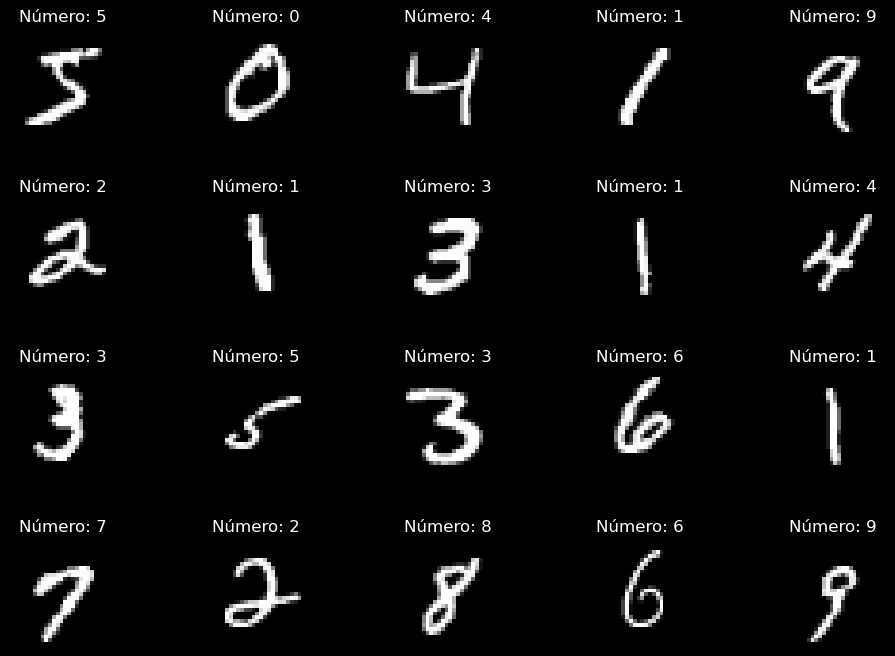

In [17]:
fig, axs = plt.subplots(4, 5, figsize=(12, 8))
fig.patch.set_facecolor('black')
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i], cmap="gray")
    ax.set_title(f"Número: {y_train[i]}", color="white")
    ax.axis("off")

fig.subplots_adjust(hspace=0.6)

plt.show()

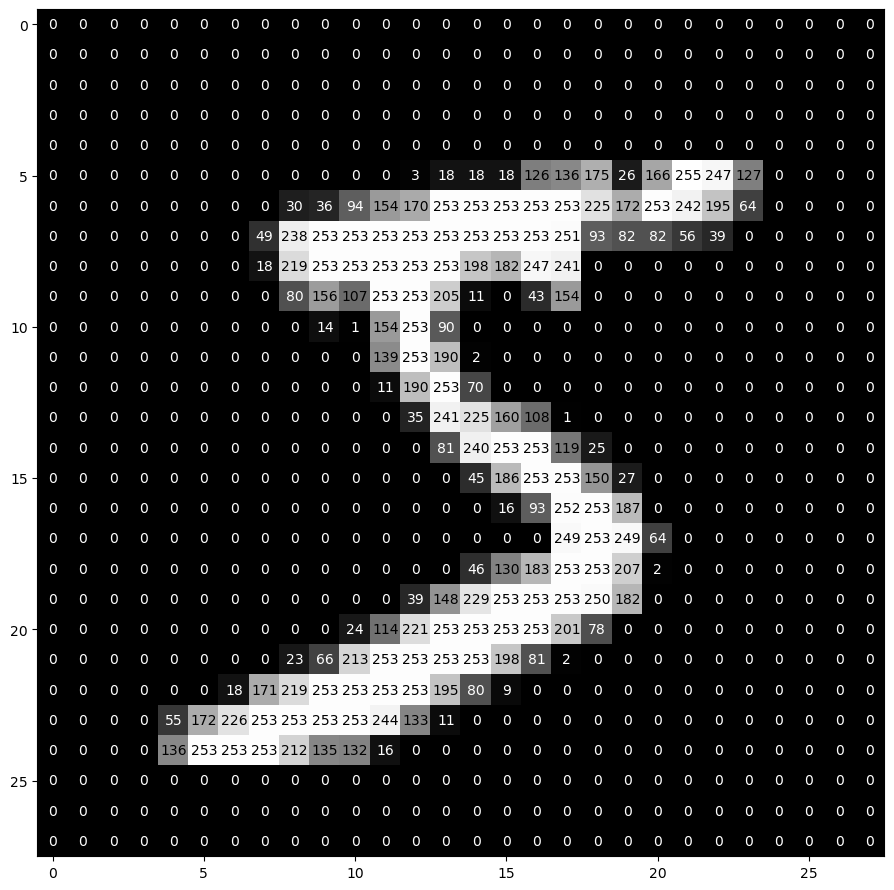

In [18]:
fig, ax = plt.subplots(figsize=(11, 11))


ax.imshow(x_train[0], cmap="gray")

for linha in range(28):
    for coluna in range(28):
        valor = x_train[0][linha][coluna]
        ax.annotate(
            str(valor),
            xy=(coluna, linha),
            color="black" if valor > 100 else "white",
            horizontalalignment="center",
            verticalalignment="center",
        )

plt.show()

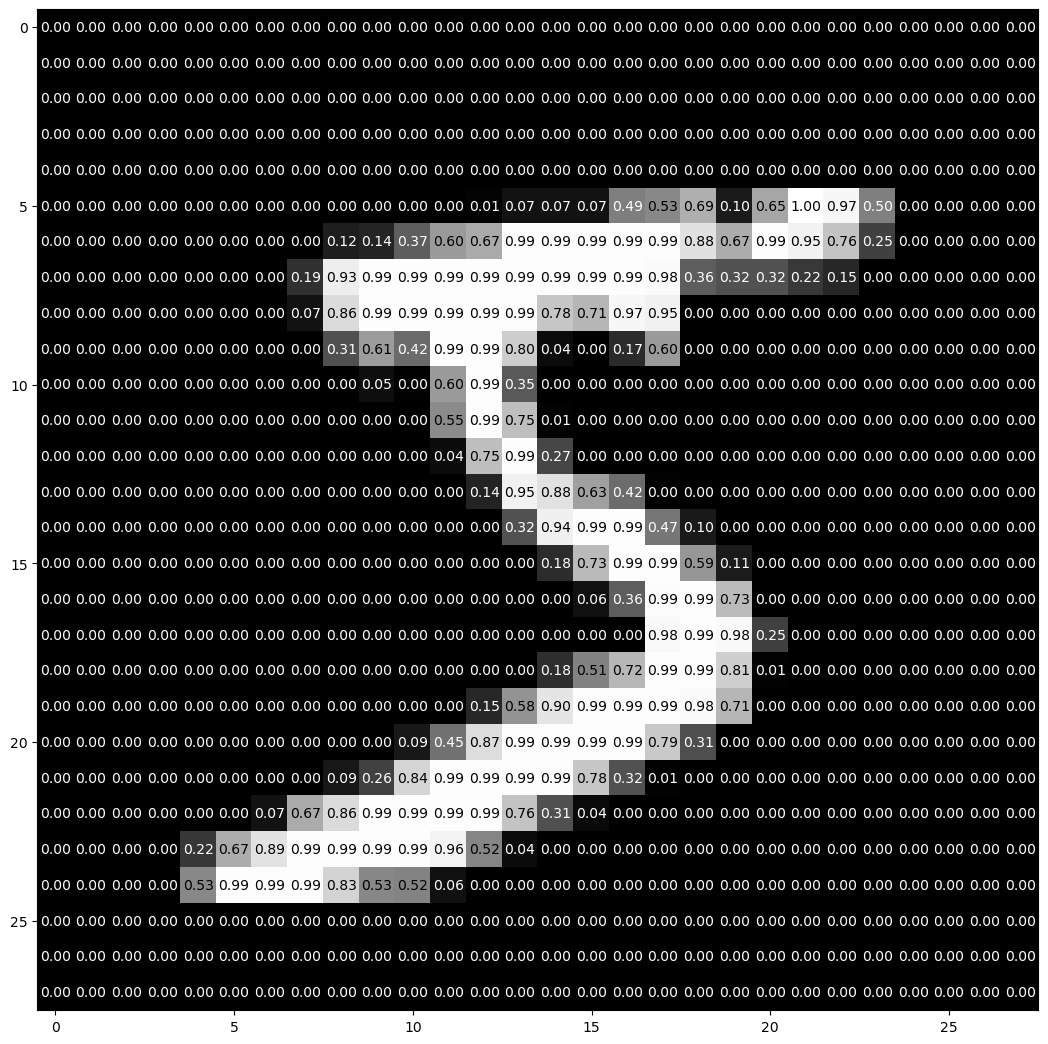

In [19]:
fig, ax = plt.subplots(figsize=(13, 13))


ax.imshow(x_train[0] / 255, cmap="gray")

for linha in range(28):
    for coluna in range(28):
        valor = x_train[0][linha][coluna] / 255
        ax.annotate(
            f"{valor:.2f}",
            xy=(coluna, linha),
            color="black" if valor > 0.5 else "white",
            horizontalalignment="center",
            verticalalignment="center",
        )

plt.show()

## Novo Modelo com Segunda Versão de CNN
### Alterações Específicas

1. **Camadas Adicionais:**
   - A segunda camada convolucional com 128 filtros permite que o modelo capture características mais complexas das imagens de entrada.

2. **Dropout Aumentado:**
   - Duas camadas `Dropout` com 20% de desativação foram adicionadas para melhorar a regularização.

3. **Redução de Overfitting:**
   - Com maior regularização e pooling, o modelo é menos propenso a overfitting, mesmo com uma maior complexidade.

4. **Total de Parâmetros:**
   - O modelo tem 106.506 parâmetros treináveis, mostrando um aumento em relação ao primeiro modelo CNN devido à segunda camada convolucional.

---

In [20]:
model = keras.models.Sequential()

model.add(keras.layers.InputLayer(input_shape=(28, 28, 1)))
model.add(keras.layers.Rescaling(scale=1./255))
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                    

## Configuração do Treinamento

### Configuração do Otimizador

- A taxa de aprendizado `1E-3` foi mantida, garantindo atualizações estáveis e eficientes nos pesos do modelo.

In [21]:
optimizer = keras.optimizers.Adam(learning_rate=1E-3)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

### Configuração do Treinamento com Early Stopping

In [22]:
early_stop = keras.callbacks.EarlyStopping(
    patience=5,
    verbose=1,
    min_delta=1E-4,
)

history = model.fit(
    x_train,
    y_train,
    epochs=300,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
)

Epoch 1/300
375/375 [==============================] - 41s 107ms/step - loss: 0.2803 - sparse_categorical_accuracy: 0.9144 - val_loss: 0.0819 - val_sparse_categorical_accuracy: 0.9772
Epoch 2/300
375/375 [==============================] - 38s 101ms/step - loss: 0.0780 - sparse_categorical_accuracy: 0.9760 - val_loss: 0.0586 - val_sparse_categorical_accuracy: 0.9828
Epoch 3/300
375/375 [==============================] - 42s 111ms/step - loss: 0.0563 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.0509 - val_sparse_categorical_accuracy: 0.9857
Epoch 4/300
375/375 [==============================] - 41s 109ms/step - loss: 0.0452 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0422 - val_sparse_categorical_accuracy: 0.9884
Epoch 5/300
375/375 [==============================] - 39s 105ms/step - loss: 0.0408 - sparse_categorical_accuracy: 0.9871 - val_loss: 0.0369 - val_sparse_categorical_accuracy: 0.9902
Epoch 6/300
375/375 [==============================] - 37s 99ms/step - loss: 0.0

### Justificativa para o Uso de uma Segunda Versão de CNN

1. **Aprofundamento da Rede:**
   - A introdução de mais camadas convolucionais aumenta a capacidade do modelo de identificar padrões visuais mais detalhados.

2. **Melhor Generalização:**
   - Camadas `Dropout` reduzem o risco de overfitting, melhorando o desempenho em dados de teste e externos.

3. **Manutenção da Eficiência Computacional:**
   - Apesar do aumento no número de parâmetros, o modelo permanece eficiente devido ao uso de pooling para redução de dimensionalidade.

---

## Etapa 7: Avaliação do Modelo
Avaliamos o modelo no conjunto de teste para medir sua capacidade de generalização.

In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0361 - sparse_categorical_accuracy: 0.9886


[0.036121468991041183, 0.9886000156402588]

## Resultados do Treinamento e Validação

### Evolução da Perda (Loss)


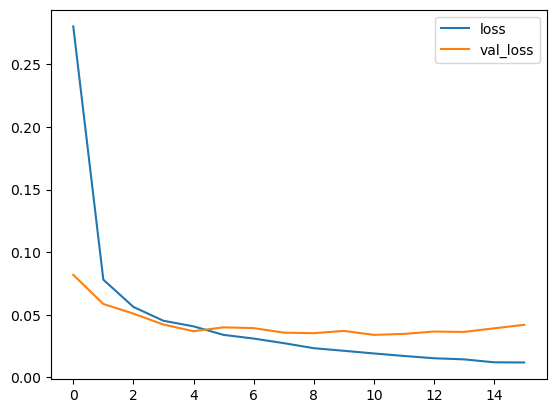

In [24]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

### Evolução da Acurácia

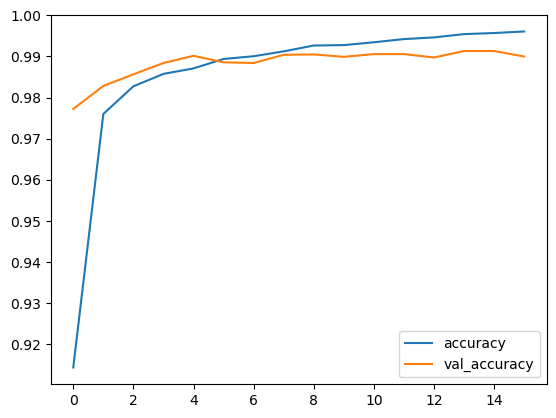

In [25]:
plt.plot(history.history["sparse_categorical_accuracy"], label="accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], label="val_accuracy")
plt.legend()
plt.show()


- **Observações:**
  - A acurácia de validação alcança níveis altos rapidamente e se mantém próxima à acurácia de treinamento, indicando boa generalização do modelo.
  - A perda no conjunto de validação (`val_loss`) permanece próxima da perda de treinamento, indicando pouca ou nenhuma evidência de overfitting significativo.

---

In [26]:
x_test[0].shape

(28, 28)

In [27]:
model.predict(np.expand_dims(x_test[0], axis=0))[0]

1/1 [==============================] - 0s 235ms/step


array([8.6158285e-12, 4.5821880e-13, 3.4934206e-07, 2.6067466e-06,
       6.9532440e-14, 1.2822516e-12, 5.8455293e-19, 9.9999702e-01,
       3.6615790e-11, 3.3573173e-08], dtype=float32)

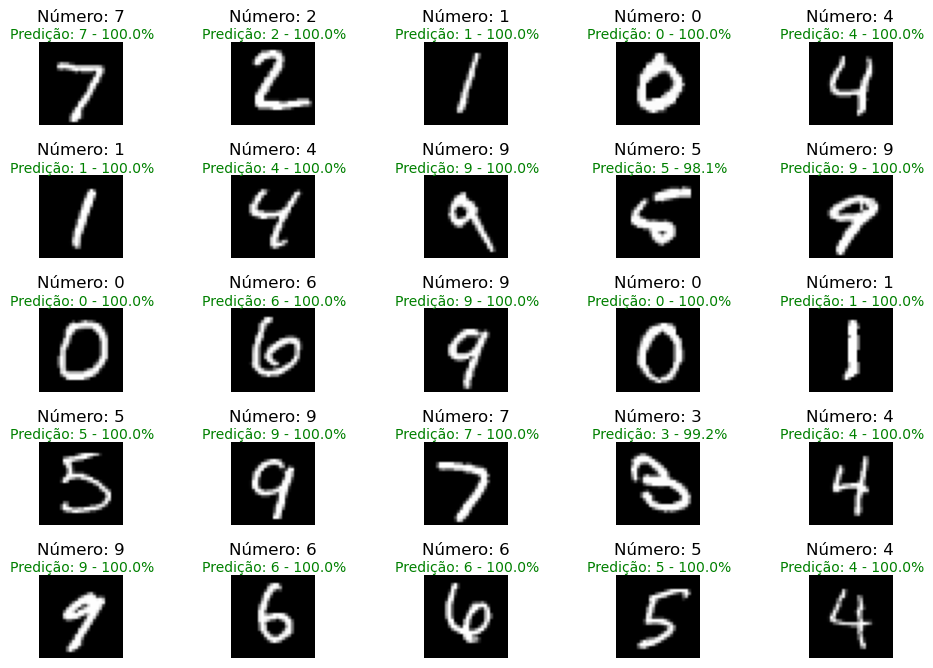

In [28]:
fig, axs = plt.subplots(5, 5, figsize=(12, 8))

for i, ax in enumerate(axs.flat):
    ax.imshow(x_test[i], cmap="gray")
    ax.set_title(f"Número: {y_test[i]}", pad=15)
    ax.axis("off")
    pred = model.predict(np.expand_dims(x_test[i], axis=0), verbose=0)[0]
    ax.text(
        14,
        -3,
        f"Predição: {pred.argmax()} - {pred.max():.1%}",
        color="green" if pred.argmax() == y_test[i] else "red",
        verticalalignment="center",
        horizontalalignment="center",

        
    )

fig.subplots_adjust(hspace=0.6)

plt.show()

## Resultados com Dados Externos

### Predições em Imagens Fora do MNIST

- **Análise:**
  - O modelo demonstrou maior robustez em relação ao primeiro CNN, acertando mais predições em imagens externas.


---

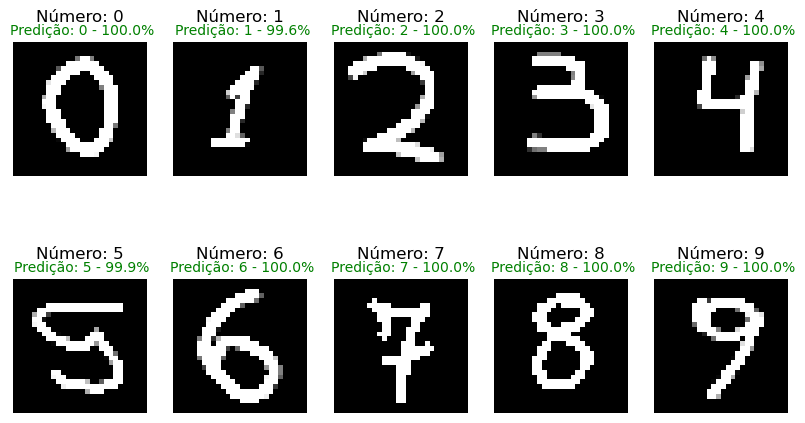

In [29]:
# Caminho para a pasta test_images dentro de PASTA_DADOS
test_images_dir = PASTA_DADOS / "test_images"


if not test_images_dir.exists():
    raise FileNotFoundError(f"A pasta {test_images_dir} não foi encontrada!")

fig, axs = plt.subplots(2, 5, figsize=(10, 5))

all_pred = {}


for i, (img, ax) in enumerate(zip(sorted(test_images_dir.glob("*.png")), axs.flat)):
    name = img.name.split(".")[0]
    img = keras.preprocessing.image.load_img(
        img, target_size=(28, 28), color_mode="grayscale"
    )

    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = 255 - img_array  # Inverta as cores da imagem
    img_array = tf.expand_dims(img_array, 0)


    pred = model.predict(img_array, verbose=0)
    all_pred[name] = pred


    ax.imshow(img_array[0], cmap="gray")
    ax.set_title(f"Número: {name}", pad=15)
    ax.axis("off")
    ax.text(
        14,
        -3,
        f"Predição: {pred.argmax()} - {pred.max():.1%}",
        color="green" if str(pred.argmax()) == name else "red",
        verticalalignment="center",
        horizontalalignment="center",
    )

fig.subplots_adjust(hspace=0.6)

plt.show()


In [30]:
all_pred["9"]

array([[1.8818679e-11, 1.3657369e-16, 1.0825881e-06, 1.9580495e-04,
        7.9634464e-17, 3.3788317e-09, 4.1487541e-17, 5.4553511e-05,
        6.6073551e-07, 9.9974781e-01]], dtype=float32)

In [31]:
all_pred["3"]

array([[1.1941723e-11, 1.0390387e-13, 1.7245986e-04, 9.9982750e-01,
        5.9926694e-17, 4.6720418e-12, 6.3240865e-18, 9.1318775e-09,
        7.2704741e-14, 4.1889816e-12]], dtype=float32)